# Perfect data size for machine learning?

#### Bhawana Agarwal

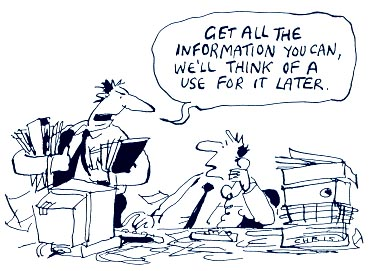

###**Does perfect data size exists?**

Data is expensive, and it is only realistically possible to get some data. Hence, an accurate sample size is essential for getting significant results and conducting the research for analysis.

**But there is no perfect size for data science or machine learning** as the size of the data set required depends on a variety of factors such as

*   **Problem complexity**: The more complex the problem, the more data you will need to train a model that can accurately capture the underlying relationships in the data.
*   **The number of features**
*   **Model complexity**: More complex models require more data to avoid overfitting, which is when a model memorizes the training data rather than learning general patterns that can be applied to new, unseen data.
*   **Data diversity**: Having a diverse data set helps ensure that your model can generalize well to new, unseen data. A diverse data set includes examples that represent different variations of the problem you are trying to solve.
*   **The desired level of accuracy**
*   **Available computational resources**: Training a model on a large data set can be computationally intensive, so it's important to consider the available computational resources when determining the minimum data size requirement.
*   **Data quality**: High quality data is important for accurate analysis, so it's important to consider the quality of the data in addition to the size of the data set.

In some cases, the minimum data size can be estimated based on rule of thumb estimates or heuristics, but these are often domain-specific and may not hold for all cases. For example, some researchers suggest that a minimum of 10 samples per feature is required for linear regression, while others suggest that 100 samples per feature is a more reasonable minimum.

So, what can be the approach?

Statistically, we can compute the data size using several methods:

*   Power analysis
*   Mead’s resource equation
*   CDF (Cumulative distribution function)

(Note: Few methods are only for the continuous data set and not for the categorical data.)

**In practice, the minimum data size requirement is usually determined through experimentation by trying different data set sizes and evaluating the performance of the model.**

In some cases, data augmentation techniques, such as synthetic data generation, can be used to artificially increase the size of the data set. However, this approach should be used with caution as the quality of the synthetic data can affect the accuracy of the model. (**We will experiment this later**)


Here's an example in Python using the popular scikit-learn library to demonstrate how to determine the minimum data size requirement for analysis.

We are using famous Titanic dataset for the reason - Everyone by now has used this dataset, hence it makes easier to relate and understand.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [2]:
# Load the Titanic dataset
data = pd.read_csv('https://raw.githubusercontent.com/bhawanaagarwal5/Datasets/main/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Exclude non-numeric and irrelevant columns
exclude_columns = ['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked']
X = data.drop(exclude_columns, axis=1)
y = data['Survived']

In [5]:
# Define categorical columns
categorical_columns = ['Sex', 'Pclass']

In [6]:
# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [7]:
# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

In [8]:
# Perform preprocessing
X_encoded = preprocessor.fit_transform(X_imputed)

In [11]:
data.shape

(891, 12)

# **Rule of thumb**

In [12]:
num_samples, num_features = data.shape
recommended_min_samples = 10 * num_features
print("Recommended minimum number of samples:", recommended_min_samples)

Recommended minimum number of samples: 120


# **Cross-validation**

In [17]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import LinearConstraint
from sklearn.model_selection import cross_val_score
# Vary the train size and perform cross-validation
train_sizes = np.linspace(0.5, 0.9, num=5)
cv_scores = []

for size in train_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=1 - size, random_state=42)
    model = RandomForestClassifier()
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print("For {}% training data, the cross-validation score is {}".format(size*100,cv_score.mean()))
    cv_scores.append(cv_score.mean())


For 50.0% training data, the cross-validation score is 0.8044943820224718
For 60.0% training data, the cross-validation score is 0.8053253394463056
For 70.0% training data, the cross-validation score is 0.8010451612903227
For 80.0% training data, the cross-validation score is 0.8173840244262781
For 90.0% training data, the cross-validation score is 0.8127251552795031


# **Learning Curve**

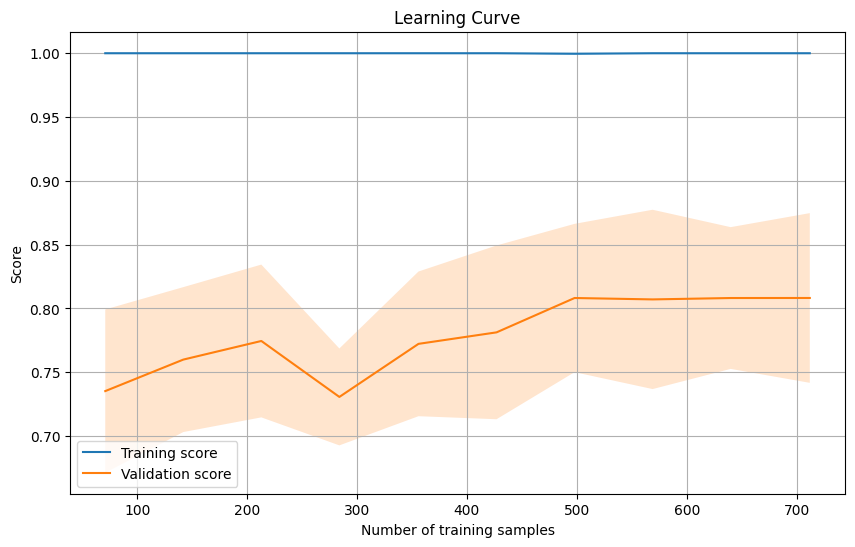

In [18]:
def plot_learning_curve(train_sizes, train_scores, val_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2)
    plt.fill_between(train_sizes, np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                     np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), alpha=0.2)
    plt.xlabel('Number of training samples')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

# Define different dataset sizes
train_sizes = np.linspace(0.1, 1.0, num=10)

# Calculate learning curve scores
train_sizes_abs, train_scores, val_scores = learning_curve(
    RandomForestClassifier(), X_encoded, y, train_sizes=train_sizes, cv=5
)

# Plot the learning curve
plot_learning_curve(train_sizes_abs, train_scores, val_scores)


# **Power analysis for F-test Anova**

In [104]:
from statsmodels.stats.power import FTestAnovaPower

effect_size = 0.2  # Small effect size
alpha = 0.05       # Significance level
power = 0.8        # Desired power

In [105]:
power_analysis = FTestAnovaPower()
required_n = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print("Required sample size for F-test:", required_n)

Required sample size for F-test: 198.15989859887426


# **Mead's correction method**

In [127]:
correction_factor = 1.0  # Adjust this based on your specific scenario
adjusted_n = required_n * correction_factor
print("Adjusted sample size with Mead's correction:", adjusted_n)


Adjusted sample size with Mead's correction: 393.4056989990335


# **Power analysis for A/B testing**

In [107]:
from statsmodels.stats.power import TTestIndPower

# Create a TTestIndPower object
power_analysis = TTestIndPower()

# Calculate the required sample size
required_n = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print("Required sample size for A/B test:", required_n)


Required sample size for A/B test: 393.4056989990335


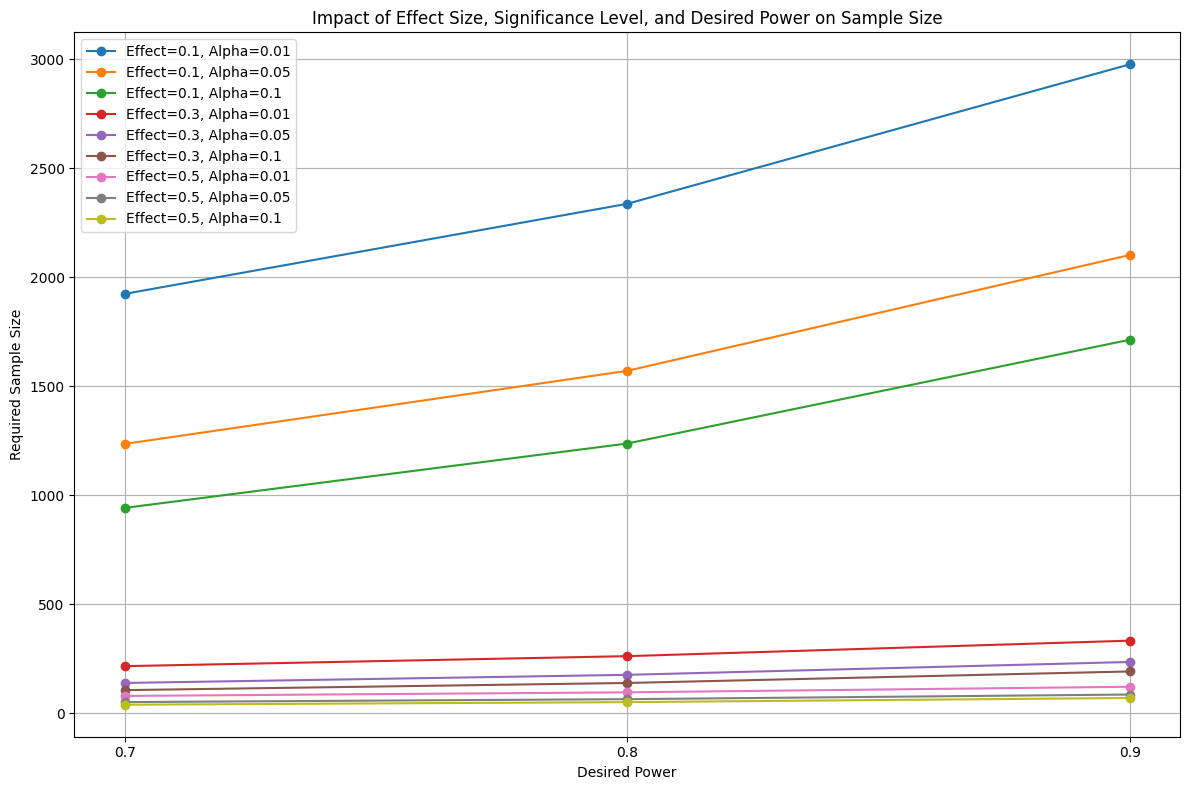

In [1]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# Varying effect sizes, significance levels, and desired powers
effect_sizes = [0.1, 0.3, 0.5]
alphas = [0.01, 0.05, 0.1]
powers = [0.7, 0.8, 0.9]

# Initialize the power analysis object
power_analysis = TTestIndPower()

# Initialize figure for plotting
plt.figure(figsize=(12, 8))

# Loop through different scenarios
for effect_size in effect_sizes:
    for alpha in alphas:
        # Calculate required sample sizes for different desired powers
        required_sample_sizes = []
        for power in powers:
            required_n = power_analysis.solve_power(
                effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided'
            )
            required_sample_sizes.append(required_n)

        # Plot results for this scenario
        plt.plot(powers, required_sample_sizes, marker='o', label=f'Effect={effect_size}, Alpha={alpha}')

# Set plot labels and legend
plt.xlabel('Desired Power')
plt.ylabel('Required Sample Size')
plt.title('Impact of Effect Size, Significance Level, and Desired Power on Sample Size')
plt.legend()
plt.grid(True)
plt.xticks(powers)
plt.tight_layout()

# Show the plot
plt.show()


**Scenario:**

Suppose you are conducting an experiment to compare the effectiveness of two different diet methods (Diet A and Diet B) in improving people's overall weight loss journey. You want to determine the sample size needed to detect a significant difference between the two methods with a power of at least 80% and a significance level of 0.05.

Here is how we can use simulation to estimate the required sample size:

Define Parameters:

Effect Size (Cohen's d): This represents the standardized difference between the means of the two groups.

Significance Level (α): Set to 0.05.

Desired Power (1 - β): Set to 0.80.

In [19]:
# Define the parameters
import numpy as np
from scipy import stats

# Parameters
effect_size = 0.5
alpha = 0.05
desired_power = 0.80

Guess the initial sample size

In [20]:
# Initial guess for sample size
sample_size_guess = 50

**Perform simulation**

Simulation Steps:

Generate data for the two groups with the specified effect size and sample size.

Perform a t-test to compare the means of the two groups.

Record whether the test was statistically significant or not.

Repeat the simulation many times (e.g., 1000 or 5000 times).

**Evaluate Results:**

Calculate the proportion of times the test was statistically significant (power) based on the simulations.

**Adjust Sample Size:**

If the observed power is below the desired power, increase the sample size guess. If the observed power is above the desired power, decrease the sample size guess.

**Repeat Simulations:**

Repeat steps 3-5 with the adjusted sample size guess until the observed power is close to the desired power.

In [21]:
# Perform simulations
simulations = 1000
for _ in range(simulations):
    # Simulate data
    group_a = np.random.normal(loc=0, scale=1, size=sample_size_guess)
    group_b = np.random.normal(loc=effect_size, scale=1, size=sample_size_guess)

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group_a, group_b)

    # Check if test is statistically significant
    if p_value < alpha:
        significant = True
    else:
        significant = False

    # Calculate observed power
    observed_power = np.mean(significant)

    # Adjust sample size guess
    if observed_power < desired_power:
        sample_size_guess += 5
    else:
        sample_size_guess -= 5

In [22]:
# Print final sample size guess
print("Estimated required sample size:", sample_size_guess)

Estimated required sample size: 40


**Note**

This is just the simplified exmaple to understand the concept. The actual scenarios might involve more complex statistical models, considerations, and assumptions.

# Conclusion

**Practical Approach (Using Code):**
Advantages: This approach provides direct insights into how a model performs on a real-world dataset. It allows you to see the actual impact of dataset size on model performance.
Use Case: This approach is useful when you have access to a dataset and want to assess model performance realistically. It helps you understand the challenges and limitations of working with a small dataset.

**Statistical Approach (Using Power Analysis an other methods):**
Advantages: Power analysis helps you estimate the required sample size to achieve a certain level of statistical power for hypothesis testing. It helps in planning studies and experiments by ensuring you have enough data to detect meaningful effects.
Use Case: This approach is beneficial when you're planning a study or experiment and want to ensure that your sample size is sufficient to detect the effect size you're interested in.


Resources -

https://meera.snre.umich.edu/power-analysis-statistical-significance-effect-size.html

https://www.youtube.com/watch?v=P8ERBy91Y90&t=180s


and my previous research on this topic in the Spring 2023 class (https://medium.com/aiskunks/perfect-data-size-in-machine-learning-f68a0e1da36b)